In [5]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
  """
  Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
  it for the linear classifier. These are the same steps as we used for the
  SVM, but condensed to a single function.  
  """
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]
  mask = np.random.choice(num_training, num_dev, replace=False)
  X_dev = X_train[mask]
  y_dev = y_train[mask]
  
  # Preprocessing: reshape the image data into rows
  X_train = np.reshape(X_train, (X_train.shape[0], -1))
  X_val = np.reshape(X_val, (X_val.shape[0], -1))
  X_test = np.reshape(X_test, (X_test.shape[0], -1))
  X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
  
  # Normalize the data: subtract the mean image
  mean_image = np.mean(X_train, axis = 0)
  X_train -= mean_image
  X_val -= mean_image
  X_test -= mean_image
  X_dev -= mean_image
  
  # add bias dimension and transform into columns
  X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
  X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
  X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
  X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
  
  return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape
print 'dev data shape: ', X_dev.shape
print 'dev labels shape: ', y_dev.shape

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Softmax Classifier

Your code for this section will all be written inside **cs231n/classifiers/softmax.py**. 


In [84]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print 'loss: %f' % loss
print 'sanity check: %f' % (-np.log(0.1))

loss: 2.405538
sanity check: 2.302585


## Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? Explain briefly.**

**Your answer:** *Fill this in*
Because W is random. So every class's probability is 0.1

In [85]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 1e2)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -1.535866 analytic: -1.535866, relative error: 4.088149e-08
numerical: 0.207062 analytic: 0.207062, relative error: 1.728396e-07
numerical: 3.025813 analytic: 3.025813, relative error: 3.152753e-09
numerical: -1.808972 analytic: -1.808972, relative error: 1.214008e-09
numerical: 2.944610 analytic: 2.944610, relative error: 5.208037e-09
numerical: -0.678890 analytic: -0.678890, relative error: 9.907323e-08
numerical: 0.155124 analytic: 0.155124, relative error: 2.797947e-07
numerical: -2.611897 analytic: -2.611897, relative error: 2.109253e-08
numerical: -1.470115 analytic: -1.470115, relative error: 3.337902e-08
numerical: 6.432863 analytic: 6.432863, relative error: 1.561340e-08
numerical: 1.830527 analytic: 1.830527, relative error: 9.046129e-09
numerical: -0.083271 analytic: -0.083271, relative error: 2.192832e-07
numerical: 0.626798 analytic: 0.626798, relative error: 2.055779e-08
numerical: 1.301124 analytic: 1.301124, relative error: 4.972787e-09
numerical: -0.595744 a

In [96]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print 'naive loss: %e computed in %fs' % (loss_naive, toc - tic)

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print 'vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'Loss difference: %f' % np.abs(loss_naive - loss_vectorized)
print 'Gradient difference: %f' % grad_difference

naive loss: 2.405538e+00 computed in 0.138727s
vectorized loss: 2.405538e+00 computed in 0.007745s
Loss difference: 0.000000
Gradient difference: 0.000000


In [120]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 5e-7]
regularization_strengths = [ 5e4]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
for lr in learning_rates:
    for reg in regularization_strengths:
        cur_softmax = Softmax()
        cur_softmax.train(X_train, y_train, learning_rate=lr, reg=reg, 
                          num_iters=1000, verbose=True)
        pred_train = cur_softmax.predict(X_train)
        pred_val = cur_softmax.predict(X_val)
        train_accuracy = np.mean(pred_train == y_train)
        val_accuracy = np.mean(pred_val == y_val)
        results[(lr, reg)] = train_accuracy, val_accuracy
        if val_accuracy > best_val:
            best_val = val_accuracy
            best_softmax = cur_softmax
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

iteration 0 / 1000: loss 6.845538
iteration 100 / 1000: loss 5.460444
iteration 200 / 1000: loss 5.358069
iteration 300 / 1000: loss 4.884569
iteration 400 / 1000: loss 4.452163
iteration 500 / 1000: loss 4.395914
iteration 600 / 1000: loss 4.360851
iteration 700 / 1000: loss 4.387382
iteration 800 / 1000: loss 4.451396
iteration 900 / 1000: loss 4.181518
iteration 0 / 1000: loss 20.983359
iteration 100 / 1000: loss 18.983726
iteration 200 / 1000: loss 18.166637
iteration 300 / 1000: loss 17.507069
iteration 400 / 1000: loss 17.077665
iteration 500 / 1000: loss 16.945886
iteration 600 / 1000: loss 16.603917
iteration 700 / 1000: loss 16.197993
iteration 800 / 1000: loss 15.829147
iteration 900 / 1000: loss 15.511635
iteration 0 / 1000: loss 774.009269
iteration 100 / 1000: loss 283.796383
iteration 200 / 1000: loss 104.976529
iteration 300 / 1000: loss 39.825522
iteration 400 / 1000: loss 15.890107
iteration 500 / 1000: loss 7.114384
iteration 600 / 1000: loss 3.926743
iteration 700 / 

cs231n/classifiers/softmax.py:75: RuntimeWarning: overflow encountered in subtract
  scores -= scores.max(axis=1)[:, np.newaxis]
cs231n/classifiers/softmax.py:75: RuntimeWarning: invalid value encountered in subtract
  scores -= scores.max(axis=1)[:, np.newaxis]


iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 782.618550
iteration 100 / 1000: loss inf
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
lr 1.000000e-07 reg 1.000000e+02 train accuracy: 0.234143 val accuracy: 0.240000
lr 1.000000e-07 reg 1.000000e+03 train accuracy: 0.236551 val accuracy: 0.238000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.328000 val accuracy: 0.340000
lr 5.000000e-07 reg 1.000000e+02 train accuracy: 0.297633 val accuracy: 0.320000
lr 5.000000e-07 reg 1.000000e+03 train accuracy: 0.329510 val accuracy: 0.348000
lr 5.000000e-07 reg 5.000000e+04 train accuracy: 0.329714 val accuracy: 0.345000
lr 1.000000e-

In [121]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'softmax on raw pixels final test set accuracy: %f' % (test_accuracy, )

softmax on raw pixels final test set accuracy: 0.304000


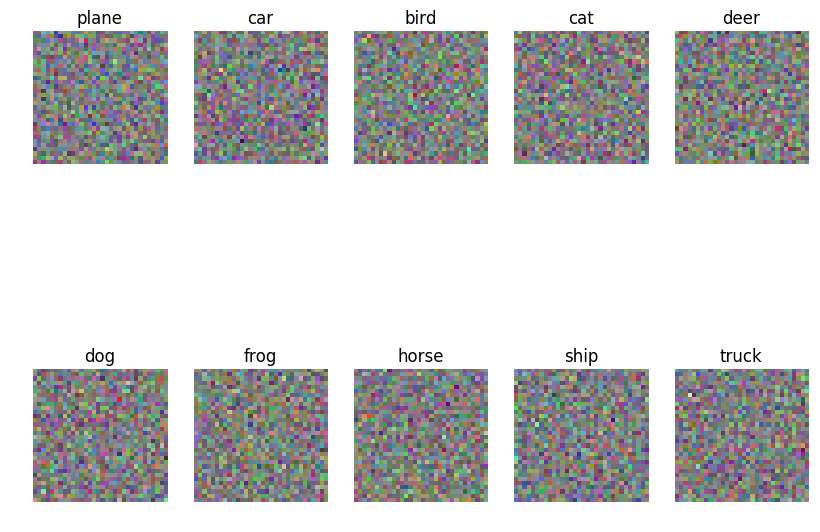

In [122]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])